# ChatGPT Tweets Sentiment Analysis.

## Table of Contents
* Data Preprocessing
* Data Visualization
* Model Training and Testing
* Comparsion Between the models selected

In [ ]:
# Import data processing modeles

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("/content/file.csv")

In [ ]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


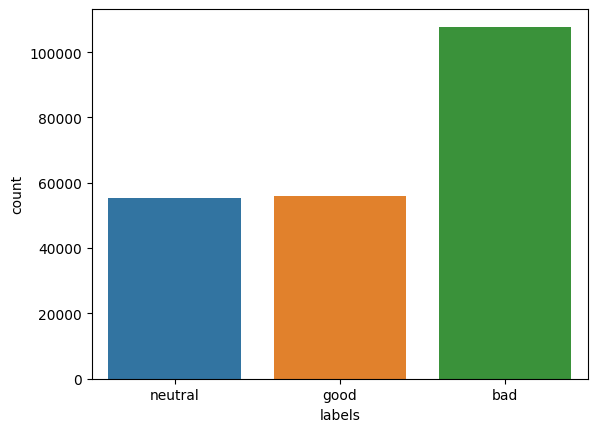

In [ ]:
sns.countplot(data = df, x = "labels")
plt.show()

In [ ]:
temp = df.groupby('labels').count()['tweets'].reset_index().sort_values(by='tweets',ascending=False)
temp.style.background_gradient(cmap='YlGn')

,labels,tweets
0,bad,107796
1,good,56011
2,neutral,55487


In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.labels,
    values = temp.tweets,
    title = {"position": "top center", "text": "Funnel-Chart"}
    ))
fig.show()

# **Data Preprocessing**

# **1. Cleaning Data**

In [ ]:
# Divide the columns

df = df[['tweets', 'labels']]

In [ ]:
df.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
# View the first 10 rows in the tweets column

for i in df.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [ ]:
# Remove all the tweet links since they all begin with https:

df['tweet_list'] = df['tweets'].str.split('https:')

In [ ]:
df.head()

,tweets,labels,tweet_list
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
1,"Try talking with ChatGPT, our new AI system wh...",good,"[Try talking with ChatGPT, our new AI system w..."
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
3,"THRILLED to share that ChatGPT, our new model ...",good,"[THRILLED to share that ChatGPT, our new model..."
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,"[As of 2 minutes ago, @OpenAI released their n..."


In [ ]:
# Select the text part of the list

text = [i[0] for i in df.tweet_list]

In [ ]:
df['text'] = text

In [ ]:
df = df[['text', 'labels']]

In [ ]:
df.head()

,text,labels
0,ChatGPT: Optimizing Language Models for Dialogue,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialogue,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
# Import regular expression for string processing

import re

In [ ]:
# Remove all non-alphanumeric characters from the text list

string = r'[A-Za-z0-9 ]'

trim_list=[]

for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [ ]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

In [ ]:
df['text'] = trim_list

In [ ]:
df['msg_lower']= df['text'].apply(lambda x: x.lower())

In [ ]:
df.head()

,text,labels,msg_lower
0,ChatGPT Optimizing Language Models for Dialogue,neutral,chatgpt optimizing language models for dialogue
1,Try talking with ChatGPT our new AI system whi...,good,try talking with chatgpt our new ai system whi...
2,ChatGPT Optimizing Language Models for Dialogue,neutral,chatgpt optimizing language models for dialogue
3,THRILLED to share that ChatGPT our new model o...,good,thrilled to share that chatgpt our new model o...
4,As of 2 minutes ago OpenAI released their new ...,bad,as of 2 minutes ago openai released their new ...


In [ ]:
df = df[['msg_lower', 'labels']]

In [ ]:
for i in df.msg_lower.head(10):
    print(i)
    print()

chatgpt optimizing language models for dialogue 

try talking with chatgpt our new ai system which is optimized for dialogue your feedback will help us improve it 

chatgpt optimizing language models for dialogue 

thrilled to share that chatgpt our new model optimized for dialog is now public free and accessible to everyone 

as of 2 minutes ago openai released their new chatgpt nnand you can use it right now  

just launched chatgpt our new ai system which is optimized for dialogue 

as of 2 minutes ago openai released their new chatgpt nnand you can use it right now n n

chatgpt coming out strong refusing to help me stalk someone but agreeing providing that someone is waldo 

0penal just deployed a thing ive been helping build the last couple of months its a chatbot based on gpt 3 im really excited to share this vln

research preview of our newest model chatgptnnwere trying something new with this preview free and immediately available for everyone no waitlist 



In [ ]:
# Map the labels to integers
# 1 for good tweet
# 0 for neutral tweet
# -1 for bad tweet

df['lab_int'] = np.where(df['labels']=='good', 1, np.where(df['labels']=='bad', -1, 0))
#This line creates a new column 'lab_int' in the DataFrame (df) by mapping the values in the 'labels' column to integers.

In [ ]:
print(df)

                                                msg_lower   labels  lab_int
0        chatgpt optimizing language models for dialogue   neutral        0
1       try talking with chatgpt our new ai system whi...     good        1
2        chatgpt optimizing language models for dialogue   neutral        0
3       thrilled to share that chatgpt our new model o...     good        1
4       as of 2 minutes ago openai released their new ...      bad       -1
...                                                   ...      ...      ...
219289  other software projects are now trying to repl...      bad       -1
219290  i asked chatgpt to write a nye joke for seos a...     good        1
219291  chatgpt is being disassembled until it can onl...      bad       -1
219292  2023 predictions by chatgpt nothing really spe...      bad       -1
219293                           from chatgpt neat stuff   neutral        0

[219294 rows x 3 columns]



# **2. Data Balance**

In [ ]:
#Using SMOTE model

# Separate your features and labels
X = df['msg_lower']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(df['msg_lower'], df['lab_int'], test_size=0.3, random_state=1)
vec = CountVectorizer(ngram_range=(1, 3), stop_words="english")
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now you can use X_train_smote and y_train_smote for training your model

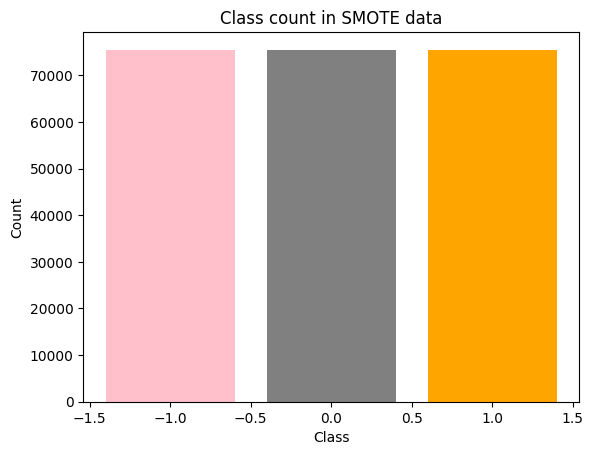

In [ ]:
#After Balancing dataset with SMOTE model
# Define a color dictionary
color_dict = {-1: 'pink', 0: 'gray', 1: 'orange'}

# Get unique labels and their counts
unique_labels, counts = np.unique(y_train_smote, return_counts=True)

# Create a list of colors based on the unique labels
colors = [color_dict[label] for label in unique_labels]

# Create a bar plot
plt.bar(unique_labels, counts, color=colors)

plt.title('Class count in SMOTE data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# **Models Training and Testing**

#  Naive Bayes

In [ ]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_smote, y_train_smote)
preds = nb.predict(X_test)

print("Accuracy (Naive Bayes):", accuracy_score(y_test, preds))

Accuracy (Naive Bayes): 0.7013178494885163


#  Random Forest

In [ ]:
# Use Random Forest as the classifier
rf_model = RandomForestClassifier()  # You can adjust the number of trees (n_estimators)
rf_model.fit(X_train_smote, y_train_smote)
rf_preds = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)
print("Accuracy - Random Forest:", rf_accuracy)

#  Logistic Regression model

In [ ]:
# Logistic Regression model training and evaluation
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
lr_preds = lr.predict(X_test)


print("Accuracy (Logistic Regression):", accuracy_score(y_test, lr_preds))

#   Decision Tree

In [ ]:
# Use Decision Tree as the classifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train_smote, y_train_smote)
dt_preds = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_preds)
print("Accuracy - Decision Tree:", dt_accuracy)

#  k-Nearest Neighbors (k-NN)



In [ ]:
# k-Nearest Neighbors model training and evaluation
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)
knn_preds = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_preds)
print("Accuracy - K-Nearest Neighbors (KNN):", knn_accuracy )

#  Support Vector Machine (SVM)

In [ ]:
# Use Support Vector Machine (SVM) as the classifier
svm_model = SVC(kernel='linear')  # You can experiment with different kernel options

svm_model.fit(X_train_smote, y_train_smote)
svm_preds = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_preds)
print("Accuracy - SVM:", svm_accuracy)


# **Comparsion between all the models we traind and tested**

In [ ]:
# Assuming 'accuracies' is a list of your model accuracies
accuracies = [70, rf_accuracy, knn_accuracy, dt_accuracy, 62, svm_accuracy]

# And 'models' is a list of your model names
models = ['NB', 'RF','knn', 'LR', 'DT', 'SVM']

plt.bar(models, accuracies, color ='maroon', width = 0.6)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.show()